## _Natural Language Processing_ 
### _Help Twitter Combat Hate Speech Using NLP and Machine Learning_
***
<b>DESCRIPTION</b>

Using NLP and ML, make a model to identify hate speech (racist or sexist tweets) in Twitter.

<b>Problem Statement:</b>
***

Twitter is the biggest platform where anybody and everybody can have their views heard. Some of these voices spread hate and negativity. Twitter is wary of its platform being used as a medium  to spread hate. 

You are a data scientist at Twitter, and you will help Twitter in identifying the tweets with hate speech and removing them from the platform. You will use NLP techniques, perform specific cleanup for tweets data, and make a robust model.

Domain: Social Media

<b>Analysis to be done:</b> Clean up tweets and build a classification model by using NLP techniques, cleanup specific for tweets data, regularization and hyperparameter tuning using stratified k-fold and cross validation to get the best model.

<b>Content: </b>

id: identifier number of the tweet

Label: 0 (non-hate) /1 (hate)

Tweet: the text in the tweet
***

<b>Tasks: </b>

Load the tweets file using read_csv function from Pandas package. 

Get the tweets into a list for easy text cleanup and manipulation.

<b>To cleanup: </b>

- Normalize the casing.
- Using regular expressions, remove user handles. These begin with '@’.
- Using regular expressions, remove URLs.
- Using TweetTokenizer from NLTK, tokenize the tweets into individual terms.
- Remove stop words.
- Remove redundant terms like ‘amp’, ‘rt’, etc.
- Remove ‘#’ symbols from the tweet while retaining the term.
- Extra cleanup by removing terms with a length of 1.

<b>Check out the top terms in the tweets:</b>
- First, get all the tokenized terms into one large list.
- Use the counter and find the 10 most common terms.

<b>Data formatting for predictive modeling:</b>
- Join the tokens back to form strings. This will be required for the vectorizers.
- Assign x and y.
- Perform train_test_split using sklearn.

<b>We’ll use TF-IDF values for the terms as a feature to get into a vector space model.</b>
- Import TF-IDF  vectorizer from sklearn.
- Instantiate with a maximum of 5000 terms in your vocabulary.
- Fit and apply on the train set.
- Apply on the test set.

</b>Model building: Ordinary Logistic Regression</b>
- Instantiate Logistic Regression from sklearn with default parameters.
- Fit into  the train data.
- Make predictions for the train and the test set.

<b>Model evaluation: Accuracy, recall, and f_1 score.</b>
- Report the accuracy on the train set.
- Report the recall on the train set: decent, high, or low.
- Get the f1 score on the train set.

<b>Looks like you need to adjust the class imbalance, as the model seems to focus on the 0s.</b>
- Adjust the appropriate class in the LogisticRegression model.

<b>Train again with the adjustment and evaluate.</b>
- Train the model on the train set.
- Evaluate the predictions on the train set: accuracy, recall, and f_1 score.

<b>Regularization and Hyperparameter tuning:</b>
- Import GridSearch and StratifiedKFold because of class imbalance.
- Provide the parameter grid to choose for ‘C’ and ‘penalty’ parameters.
- Use a balanced class weight while instantiating the logistic regression.

<b>Find the parameters with the best recall in cross-validation.</b>
- Choose ‘recall’ as the metric for scoring.
- Choose a stratified 4 fold cross-validation scheme.
- Fit into  the train set.

<b>What are the best parameters?</b>

<b>Predict and evaluate using the best estimator.</b>
- Use the best estimator from the grid search to make predictions on the test set.
- What is the recall on the test set for the toxic comments?
- What is the f_1 score?


In [2]:
#general packages for data manipulation
import os
import pandas as pd
import numpy as np
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#consistent sized plot 
from pylab import rcParams
rcParams['figure.figsize']=12,5
rcParams['axes.labelsize']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
#handle the warnings in the code
import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)
#text preprocessing libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
#import texthero
#import texthero as hero
#regular expressions
import re
#display pandas dataframe columns 
pd.options.display.max_columns = None

In [3]:
tweet=pd.read_csv("TwitterHate.csv")
tweet.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#get rid of the identifier number of the tweet
tweet.drop('id',axis=1,inplace=True)

In [5]:
#view one of the tweets randomly 
random = np.random.randint(0,len(tweet))
print(random)
tweet.iloc[random]['tweet']

20602


'which fruit brings a smile to your face? #fruitlove #smile  '

In [6]:
#create a copy of the original data to work with 
df = tweet.copy()

# _Text Cleaning_

### _Handle Diacritics using text normalization_

In [7]:
def simplify(text):
    '''Function to handle the diacritics in the text'''
    import unicodedata
    try:
        text = unicode(text, 'utf-8')
    except NameError:
        pass
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
    return str(text)

In [8]:
df['tweet'] = df['tweet'].apply(simplify)
df['tweet'].head()

0     @user when a father is dysfunctional and is s...
1    @user @user thanks for #lyft credit i can't us...
2                                  bihday your majesty
3    #model   i love u take with u all the time in ...
4               factsguide: society now    #motivation
Name: tweet, dtype: object

### _Remove user handles_

In [9]:
#test on a sample string
sample = "and @user1 i would like you to discuss with @user2 and then with @username3"
pattern = re.compile(r'@\w+')
re.findall(pattern,sample)

['@user1', '@user2', '@username3']

In [10]:
#remove all the user handles --> strings starting with @
df['tweet'].replace(r'@\w+','',regex=True,inplace=True)
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957                              ate  isz that youuu?ai 
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary, #wso...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

### _Remove the urls_

In [11]:
#test on a sample 
sample = "https://www.machinelearing.com prakhar and https://www.simple.com"
pattern = re.compile(r'http\S+')
re.findall(pattern,sample)

['https://www.machinelearing.com', 'https://www.simple.com']

In [12]:
df['tweet'].replace(r'http\S+','',regex=True,inplace=True)

In [13]:
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957                              ate  isz that youuu?ai 
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary, #wso...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

### _Tokenize using tweet tokenizer_

In [14]:
#test on a sample text
sample = 'wonderfl :-)  when are you coming for #party'
tweet_tokenize = TweetTokenizer(preserve_case=True)
tweet_tokenize.tokenize(sample)

['wonderfl', ':-)', 'when', 'are', 'you', 'coming', 'for', '#party']

In [15]:
#tokenize the tweets in the dataframe using TweetTokenizer
tokenizer = TweetTokenizer(preserve_case=True)
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [16]:
#view the tokenized tweets
df.head()

,label,tweet
0,0,"[when, a, father, is, dysfunctional, and, is, ..."
1,0,"[thanks, for, #lyft, credit, i, can't, use, ca..."
2,0,"[bihday, your, majesty]"
3,0,"[#model, i, love, u, take, with, u, all, the, ..."
4,0,"[factsguide, :, society, now, #motivation]"


### _Remove Stopwords_
_Append more words to be removed from the text - example rt and amp which occur very frequently_

In [17]:
stop_words = stopwords.words('english')

#add additional stop words to be removed from the text
additional_list = ['amp','rt','u',"can't",'ur']

for words in additional_list:
    stop_words.append(words)

In [18]:
stop_words[-10:]

["weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'amp',
 'rt',
 'u',
 "can't",
 'ur']

In [19]:
#remove stop words
def remove_stopwords(text):
    '''Function to remove the stop words from the text corpus'''
    clean_text = [word for word in text if not word in stop_words]
    return clean_text    

In [20]:
#remove the stop words from the tweets
df['tweet'] = df['tweet'].apply(remove_stopwords)

In [21]:
df['tweet']

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, #lyft, credit, use, cause, offer, whe...
2                                        [bihday, majesty]
3                      [#model, love, take, time, !, !, !]
4                    [factsguide, :, society, #motivation]
                               ...                        
31957                             [ate, isz, youuu, ?, ai]
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [#sikh, #temple, vandalised, #calgary, ,, #wso...
31961                                      [thank, follow]
Name: tweet, Length: 31962, dtype: object

### _Spelling corrections_

In [22]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [23]:
#apply spelling correction on a sample text
from textblob import TextBlob
sample = 'amazng man you did it finallyy'
txtblob = TextBlob(sample)
corrected_text = txtblob.correct()
print(corrected_text)

amazing man you did it finally


In [24]:
#textblob expect a string to be passed and not a list of strings
from textblob import TextBlob

def spell_check(text):
    '''Function to do spelling correction using '''
    txtblob = TextBlob(text)
    corrected_text = txtblob.correct()
    return corrected_text

### _Remove # symbols while retaining the text_

In [25]:
#try tremoving # symbols from a sample text
sample = '#winner #machine i am learning'
pattern = re.compile(r'#')
re.sub(pattern,'',sample)

'winner machine i am learning'

In [26]:
def remove_hashsymbols(text):
    '''Function to remove the hashtag symbol from the text'''
    pattern = re.compile(r'#')
    text = ' '.join(text)
    clean_text = re.sub(pattern,'',text)
    return tokenizer.tokenize(clean_text)   

In [27]:
df['tweet'] = df['tweet'].apply(remove_hashsymbols)

In [28]:
df['tweet']

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, lyft, credit, use, cause, offer, whee...
2                                        [bihday, majesty]
3                       [model, love, take, time, !, !, !]
4                     [factsguide, :, society, motivation]
                               ...                        
31957                             [ate, isz, youuu, ?, ai]
31958    [see, nina, turner, airwaves, trying, wrap, ma...
31959    [listening, sad, songs, monday, morning, otw, ...
31960    [sikh, temple, vandalised, calgary, ,, wso, co...
31961                                      [thank, follow]
Name: tweet, Length: 31962, dtype: object

### _Remove single and double length characters_

In [29]:
def rem_shortwords(text):
    '''Function to remove the short words of length 1 and 2 characters'''
    '''Arguments: 
       text: string
       returns: string without containing words of length 1 and 2'''
    lengths = [1,2]
    new_text = ' '.join(text)
    for word in text:
        text = [word for word in tokenizer.tokenize(new_text) if not len(word) in lengths]
        
    return new_text       
    

In [30]:
df['tweet'] = df['tweet'].apply(rem_shortwords)

In [31]:
df.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty
3,0,model love take time ! ! !
4,0,factsguide : society motivation


In [32]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [33]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


### _Remove digits_

In [34]:
def rem_digits(text):
    '''Function to remove the digits from the list of strings'''
    no_digits = []
    for word in text:
        no_digits.append(re.sub(r'\d','',word))
    return ' '.join(no_digits)   

In [35]:
df['tweet'] = df['tweet'].apply(rem_digits)

In [36]:
df['tweet'] = df['tweet'].apply(tokenizer.tokenize)

In [37]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time, !, !, !]"
4,0,"[factsguide, :, society, motivation]"


In [38]:
def rem_nonalpha(text):
    '''Function to remove the non-alphanumeric characters from the text'''
    text = [word for word in text if word.isalpha()]
    return text

In [39]:
#remove the non alpha numeric characters from the tweet tokens
df['tweet'] = df['tweet'].apply(rem_nonalpha)

## _Exploratory Data Analysis - Broad Approach_

### _Check for data balance_

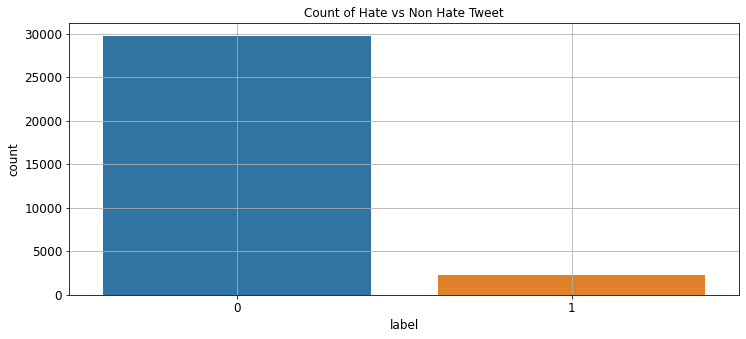

In [40]:
#plot of the count of hate and non hate tweet
sns.countplot(df['label'])
plt.title('Count of Hate vs Non Hate Tweet')
plt.grid()
plt.show()

_There are more non hatespeeches than the hatespeech in the dataset_

### _Check out the top terms in the tweets_

In [41]:
from collections import Counter
results = Counter()
df['tweet'].apply(results.update)
#print the top 10 most common terms in the tweet 
print(results.most_common(10))

[('love', 2762), ('day', 2319), ('happy', 1679), ('like', 1160), ('time', 1138), ('life', 1124), ('today', 1017), ('new', 994), ('thankful', 947), ('positive', 931)]


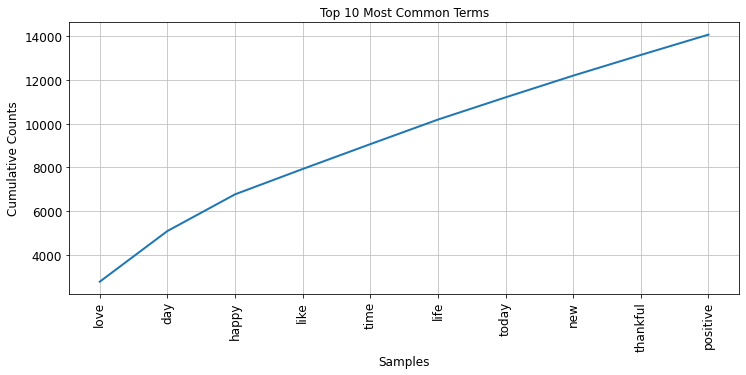

In [42]:
#plot the cumulative frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=True)
plt.show()

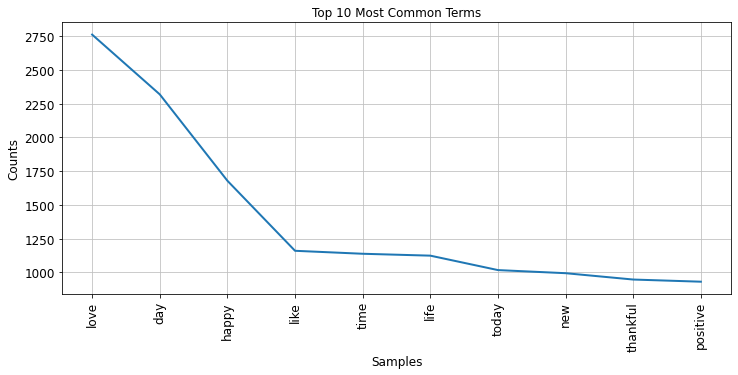

In [43]:
#plot the frequency of the top 10 most common tokens 
frequency = nltk.FreqDist(results)
plt.title('Top 10 Most Common Terms')
frequency.plot(10,cumulative=False)
plt.show()

_Love is the most frequently used word followed by day, happy etc. This is expected as there are more non hate tweets than hate tweets in the dataset_

## _Predictive Modeling_

### _Data Formatting for Predictive Modeling_

In [44]:
df.head()

,label,tweet
0,0,"[father, dysfunctional, selfish, drags, kids, ..."
1,0,"[thanks, lyft, credit, use, cause, offer, whee..."
2,0,"[bihday, majesty]"
3,0,"[model, love, take, time]"
4,0,"[factsguide, society, motivation]"


In [45]:
#check for the null values
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [46]:
#join the tokens back to form the string
df['tweet'] = df['tweet'].apply(lambda x: ' '.join(x))

In [47]:
#check the top rows
df.head(3)

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit use cause offer wheelchair ...
2,0,bihday majesty


In [48]:
#split the data into input X and output y
X = df['tweet']
y = df['label']

In [49]:
#split the data 
from sklearn.model_selection import train_test_split
seed = 51
test_size = 0.2 #20% of the data in the 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=seed,stratify=df['label'])
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(25569,) (6393,) (25569,) (6393,)


### _Use tf-idf as a feature to get into the vector space model_

In [50]:
#import tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [51]:
#instantiate the vectorizer 
vectorizer = TfidfVectorizer(max_features=5000)

In [52]:
#fit on the training data
X_train = vectorizer.fit_transform(X_train)
#transform the test data
X_test = vectorizer.transform(X_test)

In [53]:
#check the shape
X_train.shape, X_test.shape

((25569, 5000), (6393, 5000))

### _Model building: Ordinary Logistic Regression_

In [54]:
#import the models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [55]:
#instantiate the models with default hyper-parameters
clf = LogisticRegression()
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

### _Model evaluation_

In [56]:
#import the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [57]:
#get the model accuracy on the training and the test set
print('Accuracy Score on training set %.5f' %accuracy_score(y_train,train_predictions))
print('Accuracy Score on test set %.5f' %accuracy_score(y_test,test_predictions))

Accuracy Score on training set 0.95569
Accuracy Score on test set 0.94791


_Accuracy is never a good metric for an imbalanced dataset as in this case. This can be highighted using the f1 score. A low f1-score for a label indicate poor performance of the model._

In [58]:
print('Classification Report Training set')
print('\n')
print(classification_report(y_train,train_predictions))

Classification Report Training set


              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23775
           1       0.95      0.39      0.55      1794

    accuracy                           0.96     25569
   macro avg       0.95      0.69      0.76     25569
weighted avg       0.96      0.96      0.95     25569



In [59]:
print('Classification Report Testing set')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Testing set


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      5945
           1       0.90      0.29      0.44       448

    accuracy                           0.95      6393
   macro avg       0.93      0.64      0.70      6393
weighted avg       0.95      0.95      0.94      6393



_The model's f1-score is low for label 1 which indicates the hate text in the twitter_

In [60]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

_The minority to majority class ratio is 1:13_

In [61]:
#define the weight of the class labels using inverse ratio
weights = {0:1.0,1:13.0}

#instantiate the logistic regression model and account for the weights to be applied for model coefficients update magnitude
clf = LogisticRegression(solver='lbfgs',class_weight=weights)

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     23775
           1       0.60      0.98      0.74      1794

    accuracy                           0.95     25569
   macro avg       0.80      0.96      0.86     25569
weighted avg       0.97      0.95      0.96     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5945
           1       0.48      0.75      0.58       448

    accuracy                           0.92      6393
   macro avg       0.73      0.84      0.77      6393
weighted avg       0.94      0.92      0.93      6393



_The f1 score of both the training and testing set has improved compared to the plain vanilla Logistic Regression model. There is still more opportunity to improve the score using better models or even handling the data imbalance by adding synthetic data_

### _Regularization and Hyperparameter tuning:_

In [62]:
#import the required libraries for grid search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [63]:
# define search space
from scipy.stats import loguniform
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)

In [64]:
#check the search space 
print(space)

{'solver': ['newton-cg', 'lbfgs', 'liblinear'], 'penalty': ['l1', 'l2', 'elasticnet'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028DA22795E0>}


### _Fine tuned Model with Balanced Class Weights_

In [75]:
#define the model with balanced class weights
weights = {0:1.0,1:1.0}
clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4,shuffle=False)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

D:\ankonda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.55851421 0.         0.03121271 0.         0.60255429        nan
        nan        nan        nan 0.                nan        nan
        nan 0.                nan        nan 0.41918922        nan
        nan        nan        nan        nan 0.0590884  0.
 0.         0.         0.                nan 0.34393891        nan
 0.35898848        nan 0.         0.         0.40804591        nan
 0.57300698 0.54848199 0.56687729 0.23189553 0.47491201        nan
        nan        nan 0.         0.56687729        nan 0.05407851
        nan        nan        nan        nan        nan 0.
 0.                nan        nan 0.16054774 0.41473239 0.56575873
        nan        nan        nan        nan        nan        nan
        nan 0.56074138        nan 0.                nan        nan
        nan        nan 0.         0.                nan        nan
        nan     

In [76]:
#retrieve the best model 
grid_result.best_estimator_

LogisticRegression(C=25.7271952320296, class_weight={0: 1.0, 1: 1.0},
                   penalty='l1', solver='liblinear')

In [77]:
#instantiate the best model
clf = LogisticRegression(C=23.871926754399514,penalty='l1',solver='liblinear',class_weight=weights)

In [78]:
#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))

Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.99      1.00      1.00     23775
           1       0.98      0.93      0.95      1794

    accuracy                           0.99     25569
   macro avg       0.99      0.96      0.97     25569
weighted avg       0.99      0.99      0.99     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5945
           1       0.62      0.56      0.59       448

    accuracy                           0.94      6393
   macro avg       0.79      0.77      0.78      6393
weighted avg       0.94      0.94      0.94      6393



### _Fine tuned model with class weights proportional to the class imbalance_

In [84]:
#use the class weights to handle the imbalance in the labels
weights = {0:1.0,1:13}

clf = LogisticRegression(class_weight=weights)
#define the number of folds 
folds = StratifiedKFold(n_splits=4,random_state=None, shuffle=False)
# define search
grid_search = RandomizedSearchCV(estimator=clf,param_distributions=space, n_iter=100, scoring='recall',
                            n_jobs=-1, cv=folds, random_state=None)
#fit grid search on the train data
grid_result = grid_search.fit(X_train,y_train)

#retrieve the best model 
grid_result.best_estimator_

D:\ankonda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.6872825  0.         0.62877327        nan        nan        nan
 0.66609827        nan        nan 0.71013711        nan        nan
        nan 0.67057499 0.13880424        nan        nan 0.69453075
 0.                nan        nan        nan 0.                nan
 0.70735315        nan        nan 0.75195623        nan 0.
        nan        nan 0.71403963        nan        nan 0.72017678
 0.64438087        nan 0.75251054        nan        nan        nan
        nan 0.69062575 0.7224052         nan 0.76254275        nan
 0.70233082 0.03232879 0.7385758  0.71013711 0.6911813  0.42030902
 0.                nan        nan        nan        nan        nan
        nan        nan 0.73021148        nan        nan        nan
        nan 0.71348657        nan 0.67557618        nan 0.31216443
        nan        nan 0.71125442        nan        nan 0.
        nan 0.68

LogisticRegression(C=0.40797953240506973, class_weight={0: 1.0, 1: 13},
                   solver='newton-cg')

In [85]:
#instantiate the best model
clf = LogisticRegression(C=0.16731783677034165,penalty='l2',solver='liblinear',class_weight=weights)

#fit and predict
clf.fit(X_train,y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

#classification report
print('Classification Report Training set')
print('------------------------------------')
print('\n')
print(classification_report(y_train,train_predictions))
print('\n')

print('Classification Report Testing set')
print('------------------------------------')
print('\n')
print(classification_report(y_test,test_predictions))


Classification Report Training set
------------------------------------


              precision    recall  f1-score   support

           0       0.99      0.94      0.97     23775
           1       0.53      0.93      0.68      1794

    accuracy                           0.94     25569
   macro avg       0.76      0.93      0.82     25569
weighted avg       0.96      0.94      0.95     25569



Classification Report Testing set
------------------------------------


              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5945
           1       0.46      0.77      0.58       448

    accuracy                           0.92      6393
   macro avg       0.72      0.85      0.77      6393
weighted avg       0.95      0.92      0.93      6393



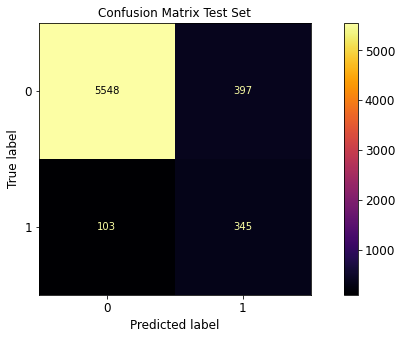

In [88]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test,cmap='inferno')
plt.title('Confusion Matrix Test Set')
plt.show()

## _Summary_

- Logistic Regression with default paramaters recall = 29%
- Logistic Regression with class weights in proportion to the data imbalance recall = 75%
- Logistic Regression fine tuned with grid search and balanced class weights recall = 56%
- Logistic Regression fine tuned with grid search and class weights in proportion to data imbalance recall = 77%
